In [191]:
#importing dataframe related dataframes
import pandas as pd
import numpy as np

#importing plot related libraires
import seaborn as sns
import matplotlib.pyplot as plt

#to remove warnings
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [192]:
# from google.colab import drive
# drive.mount('/content/drive')

In [193]:
# import os 
# PATH='/content/drive/MyDrive/MITH'
# os.chdir(PATH)

In [194]:
# !ls

In [195]:

null_values=['NA',np.nan,'?',',','.',' ']     # listing null values

#reading train file 1
train1=pd.read_csv("Insurance_Claim_Info_data.csv",na_values=null_values)
train1.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools


In [196]:
#reading train2 file
train2=pd.read_csv("Insurance_Date_data.csv",na_values=null_values)
train2.head()

,Claim Number,Incident Date,Date Received
0,BCHKRDM32K,21-10-2007,31-10-2007
1,B3GPD5IZQW,26-05-2006,14-06-2006
2,EB757CV6XW,18-01-2004,10-02-2004
3,SP0Z0Q95OV,28-04-2004,06-05-2004
4,VKZUK7J3KK,04-11-2007,14-11-2007


In [197]:
# formatting the dates into datetime in train file 2

train2['Incident Date']=pd.to_datetime(train2['Incident Date'],format='%d-%m-%Y')
train2['Date Received']=pd.to_datetime(train2['Date Received'],format='%d-%m-%Y')
train2.dtypes

Claim Number             object
Incident Date    datetime64[ns]
Date Received    datetime64[ns]
dtype: object

In [198]:
#reading train3 file
train3=pd.read_csv("Insurance_Result_data.csv",na_values=null_values)
train3.head()

,Claim Number,Claim Amount,Close Amount,Disposition
0,Y5VA9KOE89,100.00,0.00,Deny
1,P51DOJLR8W,199.99,0.00,Deny
2,OUUZFP7EFL,410.00,59.85,Settle
3,CGP3L1CCP2,240.00,0.00,Deny
4,JDFLPD7J9Z,11.36,11.36,Approve in Full


In [199]:
#reading test file
test_data=pd.read_excel('test_data-1663477366404.xlsx',na_values=null_values)

In [200]:
#merging train1 and train 2 on basiss of Claim Number
data1=pd.merge(train1,train2,on='Claim Number',how='left')
data1.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-07-06
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-12-05
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-08-12


In [201]:
#merging both above data1 and train3 on basis of Claim Number
train_data=pd.merge(data1,train3,on='Claim Number',how='left')
train_data.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-07-06,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-12-05,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-08-12,83.46,41.73,Settle


In [202]:
train_data.describe(include='all')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
count,34110,34110,34110,34110,34110,34110,34110,34110,34110,34110.000000,34110.000000,34110
unique,34110,23,23,13,2,3,13,2685,1832,NaN,NaN,3
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,2004-04-19 00:00:00,2004-04-21 00:00:00,NaN,NaN,Deny
freq,1,2562,2562,6259,21216,28806,8110,38,215,NaN,NaN,17848
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-10 00:00:00,1994-01-05 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-22 00:00:00,2055-05-17 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.844178,104.883016,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8290.881802,1393.564677,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.000000,NaN


In [203]:
#copying train file for the sake of finding instances
train_ins=train_data.copy()

In [204]:
train_ins

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-07-06,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-12-05,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-08-12,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [205]:
#finding the null values
train_data.isnull().sum()

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
dtype: int64

## To find the average % of claims received when the claim is 'Settled' 

In [206]:

in1=train_data.groupby(['Disposition','Claim Type']).size().reset_index().rename(columns={0:'size'})

In [207]:
insight1=in1.groupby(by='Disposition',axis=0).sum().reset_index() #using groupby attribute 
insight1.head()

,Disposition,size
0,Approve in Full,9052
1,Deny,17848
2,Settle,7210


In [208]:
insight1['size']=insight1['size']/sum(insight1['size'])  # to get the average percentage

In [209]:
insight1.head()

,Disposition,size
0,Approve in Full,0.265377
1,Deny,0.523248
2,Settle,0.211375


<AxesSubplot: xlabel='Disposition', ylabel='size'>

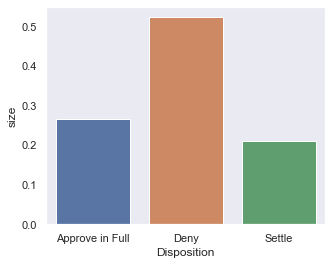

In [210]:
#plotting the sizes of Disposition using barpolot
plt.figure(figsize=(5,4))
sns.barplot(insight1['Disposition'],insight1['size'])

## To find Which 'Product' has the highest delay in Reporting (In days)

In [211]:
train_ins.dtypes

Claim Number               object
City Code                  object
City                       object
Enterprise Type            object
Claim Type                 object
Claim Site                 object
Product Insured            object
Incident Date      datetime64[ns]
Date Received      datetime64[ns]
Claim Amount              float64
Close Amount              float64
Disposition                object
dtype: object

In [212]:
# to get delay period by subtracting from Date Received and Incident Date
train_ins['Reporting delay']=(train_ins['Date Received']-train_ins['Incident Date'] ).dt.days

In [214]:
#adding delay period for all Claims
train_ins

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Reporting delay
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-07-06,490.00,0.00,Deny,42
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-12-05,507.88,0.00,Deny,22
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-08-12,83.46,41.73,Settle,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny,8
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148


In [ ]:
in5=train_ins.groupby(['Product Insured','Reporting delay']).size()
insight3=in5.groupby(by='Product Insured',axis=0).sum().reset_index() #using groupby attribute 
insight3

<AxesSubplot: xlabel='Product Insured', ylabel='Reporting delay'>

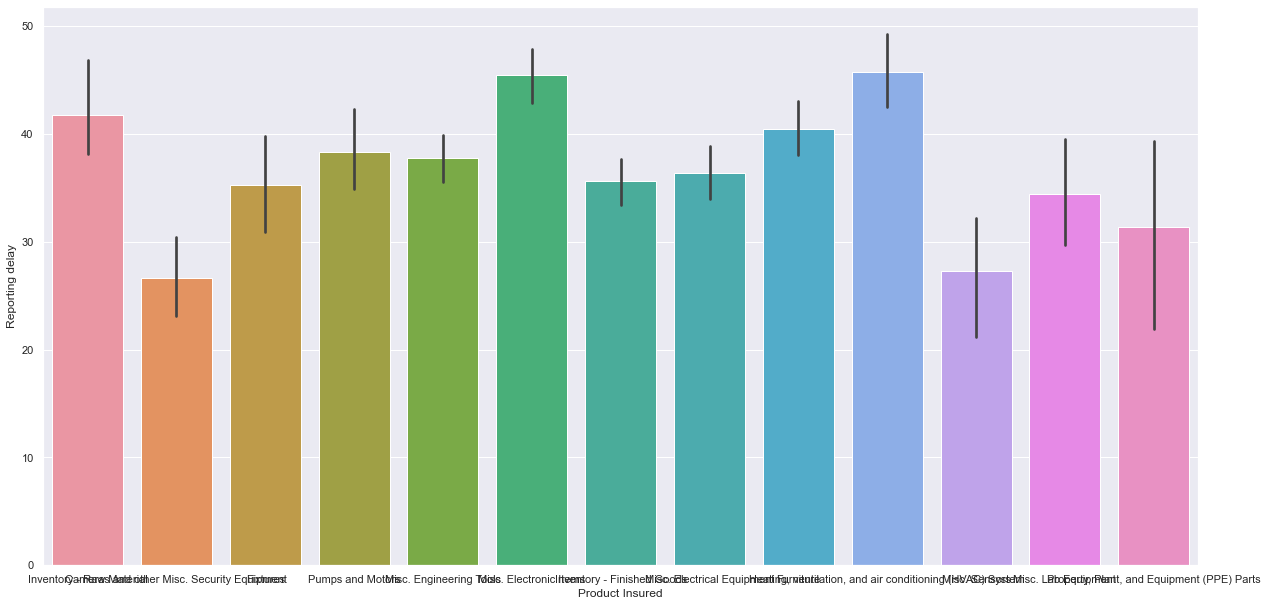

In [213]:
#plotting how the reporting delay for different for Product Insured
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.barplot(train_ins['Product Insured'],train_ins['Reporting delay'])

<AxesSubplot: title={'center': 'no of claim types'}, xlabel='Claim Type', ylabel='count'>

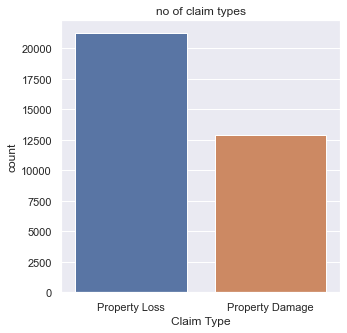

In [303]:
#plotting for number of different Claim types
plt.figure(figsize=(5,5))
plt.title('no of claim types')
sns.countplot(train_ins['Claim Type'])

<AxesSubplot: title={'center': 'no of incidents in each city'}, xlabel='City', ylabel='count'>

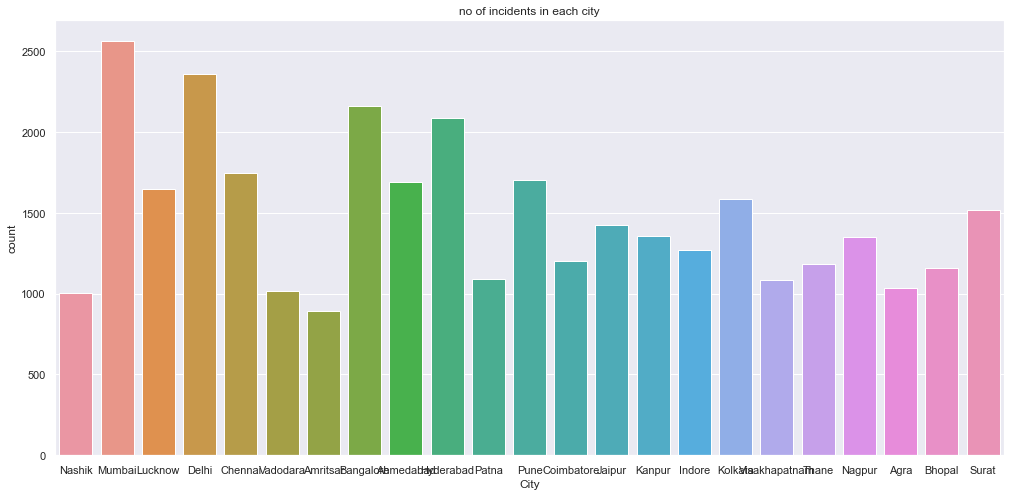

In [302]:
# plot for cities having number of incidents and finding out the city which is having highest number of incidents
plt.figure(figsize=(17,8))
plt.title('no of incidents in each city')
sns.countplot(train_ins['City'])

<AxesSubplot: title={'center': 'scatter plot'}, xlabel='Close Amount', ylabel='Claim Amount'>

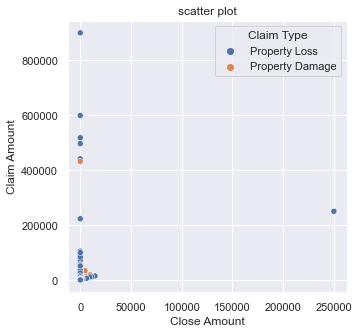

In [301]:
#plot for how claim type and claim amount varies 
#from this plot the property loss 
plt.figure(figsize=(5,5))
plt.title('scatter plot')
sns.scatterplot('Close Amount','Claim Amount',hue='Claim Type',data=train_ins)

<AxesSubplot: xlabel='Product Insured', ylabel='Close Amount'>

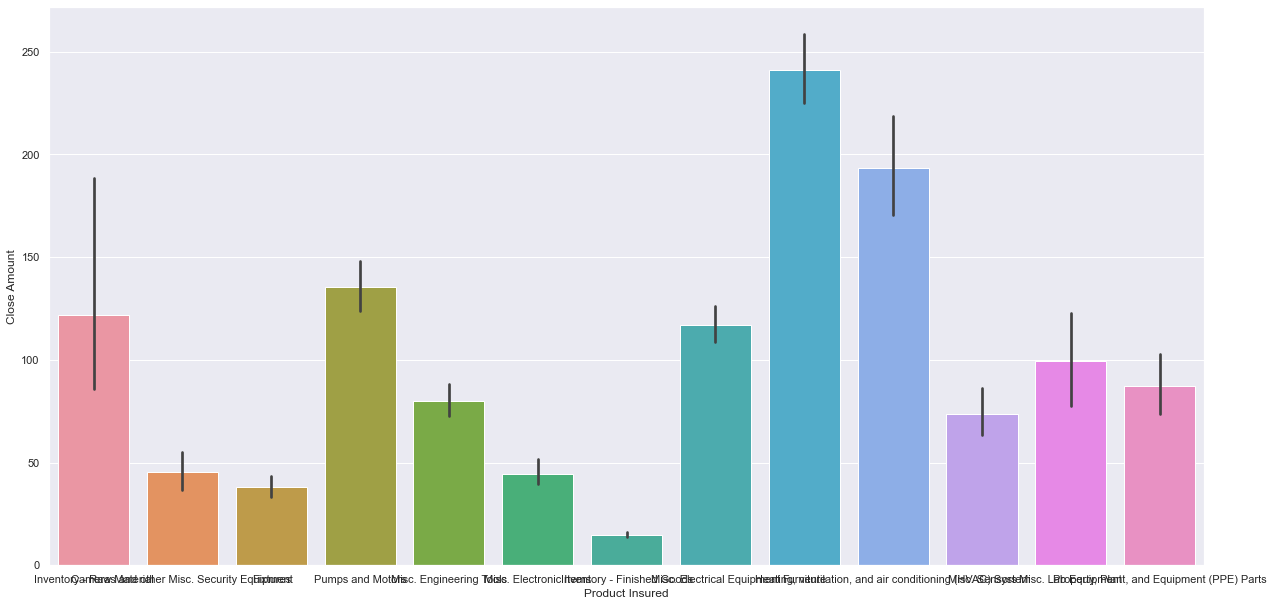

In [300]:
#people Report Products with more value earlier compared to Products with less value
sns.barplot(train_ins['Product Insured'],train_ins['Close Amount'])

In [ ]:
in4=main.groupby(['Product Insured','Close Amount']).sum()
insight=in4.groupby(by='Product Insured',axis=0).sum().reset_index() #using groupby attribute 
insight

In [218]:
#assigning numerical data feature sinto list
nume=['Claim Amount','Close Amount']

In [219]:
#again i created copied data from train_data for the sake of boxplot 
train_new=train_data.copy()

In [148]:
#creating new dataframe removing outliers in both claim amount and close amount
for col in nume:
    train_new[col].sort_values()
    q1=train_new[col].quantile(0.25)
    q3=train_new[col].quantile(0.75)
    IQR=q3-q1
    upper_whisker=q3+(1.5*IQR)
    lower_whisker=q1-(1.5*IQR)
    #train_new[col]=np.where(train_new[col]>upper_whisker,upper_whisker,np.where(train_new[col]<lower_whisker,lower_whisker,train_new[col]))
    #train_new.drop([train_new[col]],axis=1)
    index = train_new[ (train_new[col] > upper_whisker) | (train_new[col] < lower_whisker)].index
    train_new.drop(index,inplace=True)
train_new.shape

(26565, 12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


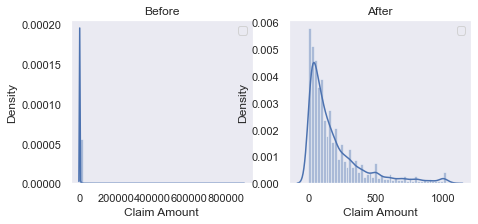

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


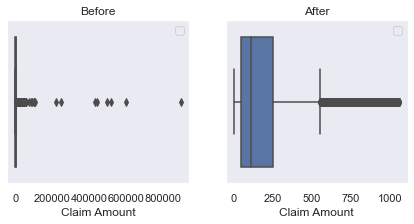

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1490.4x739.44 with 0 Axes>

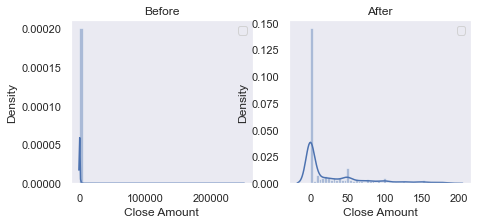

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


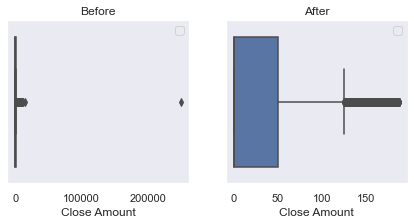

<Figure size 1490.4x739.44 with 0 Axes>

In [149]:

#plots for before and after removinng outliers
sns.set_style('dark')
for col in train_ins[nume]:
    plt.figure(figsize=(15,3))
    
    plt.subplot(141)
    sns.distplot(train_ins[col])
    plt.title("Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(train_new[col])
    plt.title("After")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,3))
    plt.subplot(143)
    sns.boxplot(train_ins[col])
    plt.title("Before")
    plt.legend(labels=None)
    
    plt.subplot(144)
    sns.boxplot(train_new[col])
    plt.title("After")
    plt.legend()
    plt.show()
    plt.tight_layout()

In [ ]:
#train_ins['']

In [220]:
# I did not remove outliers

## For model

In [150]:
train_data.dtypes

Claim Number               object
City Code                  object
City                       object
Enterprise Type            object
Claim Type                 object
Claim Site                 object
Product Insured            object
Incident Date      datetime64[ns]
Date Received      datetime64[ns]
Claim Amount              float64
Close Amount              float64
Disposition                object
dtype: object

In [151]:
test_data.head()

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,2009-11-02 00:00:00,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,2005-01-09 00:00:00,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,2005-01-06 00:00:00,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,2003-01-04 00:00:00,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items


In [222]:
#finding the null vaues in train data
train_data.isnull().sum()

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
dtype: int64

In [152]:
#finding the null vaues in test data
test_data.isnull().sum()

Claim Number       0
Incident Date      0
Date Received      0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
dtype: int64

In [224]:
#test data copied for the sake of submssion file to take id
test_id=test_data.copy()

In [225]:
train_data.describe(include='all')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
count,34110,34110,34110,34110,34110,34110,34110,34110,34110,34110.000000,34110.000000,34110
unique,34110,23,23,13,2,3,13,2685,1832,NaN,NaN,3
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,2004-04-19 00:00:00,2004-04-21 00:00:00,NaN,NaN,Deny
freq,1,2562,2562,6259,21216,28806,8110,38,215,NaN,NaN,17848
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-10 00:00:00,1994-01-05 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-22 00:00:00,2055-05-17 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.844178,104.883016,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8290.881802,1393.564677,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.000000,NaN


In [227]:
train_data.columns #columns of the train data

Index(['Claim Number', 'City Code', 'City', 'Enterprise Type', 'Claim Type',
       'Claim Site', 'Product Insured', 'Incident Date', 'Date Received',
       'Claim Amount', 'Close Amount', 'Disposition'],
      dtype='object')

In [228]:
test_data.columns  #columns of the test data

Index(['Claim Number', 'Incident Date', 'Date Received', 'City Code', 'City',
       'Enterprise Type', 'Claim Type', 'Claim Site', 'Product Insured'],
      dtype='object')

In [229]:
#dropping the unnecessary columns in the train data
train_data.drop(['Claim Number','City','Incident Date','Date Received','Claim Amount','Close Amount'],axis=1,inplace=True)

In [230]:
train_data.columns

Index(['City Code', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Disposition'],
      dtype='object')

In [231]:
#dropping the unnecessary columns in the test data
test_data.drop(['Claim Number','Incident Date','Date Received','City'],axis=1,inplace=True)

In [232]:
test_data.columns

Index(['City Code', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured'],
      dtype='object')

In [233]:
train_data.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition
0,NSK,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,Deny
1,BOM,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,Settle
2,LKO,Public Limited Company,Property Loss,In Transit,Fixtures,Approve in Full
3,DEL,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,Deny
4,DEL,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,Settle


In [163]:
y=train_data[['Disposition']]
y['Disposition']=y['Disposition'].astype("category")
train_data.drop('Disposition',axis=1,inplace=True)
x=train_data

In [164]:
x.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured
0,NSK,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,BOM,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,LKO,Public Limited Company,Property Loss,In Transit,Fixtures
3,DEL,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,DEL,One Person Company,Property Loss,In Transit,Misc. Engineering Tools


In [165]:
test_data.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured
0,PNQ,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,PNQ,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,AMD,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,DEL,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,PNQ,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items


In [235]:
#splitting the train data into train and validation data using stratify to remove the immbalance
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

In [237]:
#using OneHotEncoder for categorical data 
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore")   # ignore used to remove the classes in test featrure which are not in train feature
#fitting on the train data
ohe.fit(x_train)

OneHotEncoder(handle_unknown='ignore')

In [238]:
#list out the columns names
cols=list(ohe.get_feature_names(x_train.columns))

In [239]:
#transform onto the train data
x_train=pd.DataFrame(ohe.transform(x_train).todense(),columns=cols)


In [240]:
x_train.head()

,City Code_AGR,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,...,"Product Insured_Heating, ventilation, and air conditioning (HVAC) System",Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
#transform onto the validation data
x_test=pd.DataFrame(ohe.transform(x_test).todense(),columns=cols)

In [243]:
#transform onto the test(unseen) data
test_data=pd.DataFrame(ohe.transform(test_data).todense(),columns=cols)

ValueError: X has 54 features, but OneHotEncoder is expecting 5 features as input.

In [244]:
#applying label encoder for the cateogrical data in target
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#fit on the y_train
le.fit(y_train)

LabelEncoder()

In [245]:
#transform on to the train 
y_train['Disposition']=le.transform(y_train['Disposition'])


In [249]:
#transform on to the validation
y_test['Disposition']=le.transform(y_test['Disposition'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Logistic Regression

In [260]:
from sklearn.metrics import classification_report as cr,confusion_matrix

In [252]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [253]:
train_predlr=lr.predict(x_train)
test_predlr=lr.predict(x_test)

In [264]:
print('---confusion_matrix on train-----')
print(confusion_matrix(train_predlr,y_train))
print('---confusion_matrix on validation----')
print(confusion_matrix(test_predlr,y_test))

---confusion_matrix on train-----
[[ 1323  1259   485]
 [ 5905 13005  5272]
 [   14    14    11]]
---confusion_matrix on validation----
[[ 347  315  125]
 [1459 3253 1313]
 [   4    2    4]]


In [263]:
print("--------train data---------")
print(cr(train_predlr,y_train))
print("--------validation data---------")
print(cr(y_test,test_predlr))

--------train data---------
              precision    recall  f1-score   support

           0       0.18      0.43      0.26      3067
           1       0.91      0.54      0.68     24182
           2       0.00      0.28      0.00        39

    accuracy                           0.53     27288
   macro avg       0.37      0.42      0.31     27288
weighted avg       0.83      0.53      0.63     27288

--------validation data---------
              precision    recall  f1-score   support

           0       0.44      0.19      0.27      1810
           1       0.54      0.91      0.68      3570
           2       0.40      0.00      0.01      1442

    accuracy                           0.53      6822
   macro avg       0.46      0.37      0.32      6822
weighted avg       0.48      0.53      0.43      6822



## Decission Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
train_predsdtc=dtc.predict(x_train)
test_predsdtc=dtc.predict(x_test)

In [265]:
print('---confusion_matrix on train-----')
print(confusion_matrix(train_predsdtc,y_train))
print('---confusion_matrix on validation----')
print(confusion_matrix(test_predsdtc,y_test))

---confusion_matrix on train-----
[[ 3902  1906   935]
 [ 3119 12021  3642]
 [  221   351  1191]]
---confusion_matrix on validation----
[[ 685  684  325]
 [ 996 2661  990]
 [ 129  225  127]]


In [182]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsdtc))
print("--------validation data---------")
print(cr(y_test,test_predsdtc))

--------train data---------
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      7242
           1       0.64      0.84      0.73     14278
           2       0.68      0.21      0.32      5768

    accuracy                           0.63     27288
   macro avg       0.63      0.53      0.53     27288
weighted avg       0.63      0.63      0.60     27288

--------validation data---------
              precision    recall  f1-score   support

           0       0.40      0.38      0.39      1810
           1       0.57      0.75      0.65      3570
           2       0.26      0.09      0.13      1442

    accuracy                           0.51      6822
   macro avg       0.41      0.40      0.39      6822
weighted avg       0.46      0.51      0.47      6822



In [266]:
#prediction on the test data
final_predsdt=dtc.predict(test_data)


In [267]:
#creating dataframe on test predictions
col=['Disposition']
final_preddtc=pd.DataFrame(final_predsdt,columns=col)

In [268]:
# inversing the labeled one into actual names using transform of label encoder
final_preddtc['Disposition']=le.inverse_transform(final_preddtc['Disposition'])

In [269]:
#concating both test id and prediction of test dat
submitdt=pd.concat([test_id['Claim Number'],final_preddtc],axis=1)

In [270]:
#coverting into csv file
submitdt.to_csv('submission@dt@withoutgrid.csv',index=False)

# DecisionTree with GridSearchCV

In [273]:
from sklearn.model_selection import GridSearchCV #importing the GridSearchcv

In [275]:
paramsdt={'criterion':['gini','entropy','log_loss'],'max_depth':[5,10,30,50]}   #giving set of parameters to get the best

In [276]:
dtc_grid=GridSearchCV(estimator=dtc,param_grid=paramsdt,verbose=1)

In [277]:
#apply on train data
dtc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 30, 50]},
             verbose=1)

In [278]:
train_predsdtgsv=dtc_grid.predict(x_train)
test_predsdtgsv=dtc_grid.predict(x_test)

In [109]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsdtgsv))
print("--------validation data---------")
print(cr(y_test,test_predsdtgsv))

--------train data---------
              precision    recall  f1-score   support

           0       0.54      0.26      0.35      7276
           1       0.55      0.92      0.69     14267
           2       0.67      0.00      0.00      5745

    accuracy                           0.55     27288
   macro avg       0.59      0.39      0.35     27288
weighted avg       0.57      0.55      0.45     27288

--------validation data---------
              precision    recall  f1-score   support

           0       0.53      0.25      0.34      1776
           1       0.55      0.92      0.69      3581
           2       0.00      0.00      0.00      1465

    accuracy                           0.55      6822
   macro avg       0.36      0.39      0.34      6822
weighted avg       0.43      0.55      0.45      6822



In [279]:
final_predsdtgsv=dtc.predict(test_data)

In [282]:
#creating dataframe on test predictions
col=['Disposition']
final_preddtcgsv=pd.DataFrame(final_predsdtgsv,columns=col)

In [283]:
# inversing the labeled one into actual names using transform of label encoder
final_preddtcgsv['Disposition']=le.inverse_transform(final_preddtcgsv['Disposition'])

In [284]:
#concating both test id and prediction of test dat
submitdtgsv=pd.concat([test_id['Claim Number'],final_preddtcgsv],axis=1)

In [285]:
#coverting into csv file
submitdtgsv.to_csv('submission@dtcgsvwith grid.csv',index=False)

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier()
rtc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
train_predsrf=rtc.predict(x_train)
test_predsrf=rtc.predict(x_test)

In [67]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsrf))
print("--------validation data---------")
print(cr(y_test,test_predsrf))

--------train data---------
              precision    recall  f1-score   support

           0       0.60      0.49      0.54      7276
           1       0.64      0.86      0.73     14267
           2       0.61      0.25      0.36      5745

    accuracy                           0.63     27288
   macro avg       0.62      0.53      0.54     27288
weighted avg       0.62      0.63      0.60     27288

--------train data---------
              precision    recall  f1-score   support

           0       0.40      0.32      0.36      1776
           1       0.57      0.77      0.65      3581
           2       0.27      0.10      0.15      1465

    accuracy                           0.51      6822
   macro avg       0.41      0.40      0.39      6822
weighted avg       0.46      0.51      0.47      6822



In [75]:
final_predsrtc=rtc.predict(test_data)


In [76]:
col=['Disposition']
final_predrtc=pd.DataFrame(final_predsrtc,columns=col)

In [78]:
final_predrtc['Disposition']=le.inverse_transform(final_predrtc['Disposition'])

In [81]:
submitrtf=pd.concat([test_id['Claim Number'],final_predrtc],axis=1)

In [83]:
submitrtf.to_csv('submissionrtfwithoutgrid.csv',index=False)

## Random Forest With gridsearchCV

In [96]:

params={'n_estimators':[100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[5,10,30,50]}

In [97]:
rfc_grid=GridSearchCV(estimator=rtc,param_grid=params,verbose=1)

In [98]:
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 30, 50],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [99]:
train_preds=rfc_grid.predict(x_train)
test_preds=rfc_grid.predict(x_test)

In [100]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_preds))
print("--------validation data---------")
print(cr(y_test,test_preds))

--------train data---------
              precision    recall  f1-score   support

           0       0.59      0.24      0.34      7276
           1       0.55      0.94      0.69     14267
           2       0.77      0.01      0.01      5745

    accuracy                           0.56     27288
   macro avg       0.64      0.39      0.35     27288
weighted avg       0.61      0.56      0.46     27288

--------train data---------
              precision    recall  f1-score   support

           0       0.56      0.22      0.32      1776
           1       0.55      0.93      0.69      3581
           2       0.36      0.00      0.01      1465

    accuracy                           0.55      6822
   macro avg       0.49      0.38      0.34      6822
weighted avg       0.51      0.55      0.44      6822



In [286]:
final_preds=rfc_grid.predict(test_data)

In [289]:
col=['Disposition']
final_preds=pd.DataFrame(final_preds,columns=col)

In [290]:
final_preds['Disposition']=le. inverse_transform(final_preds['Disposition'])

In [291]:
final_preds

,Disposition
0,Approve in Full
1,Deny
2,Deny
3,Deny
4,Deny
...,...
3786,Deny
3787,Deny
3788,Deny
3789,Deny


In [292]:
sub=pd.concat([test_id['Claim Number'],final_preds],axis=1)
sub

,Claim Number,Disposition
0,6EYB31JGFR,Approve in Full
1,HJLRXONE3R,Deny
2,IUOV99JA22,Deny
3,BGOUHQ2LKK,Deny
4,HDCG60QET1,Deny
...,...,...
3786,IMQYY73AOP,Deny
3787,2AR1OGIMH4,Deny
3788,SB4IET2MO5,Deny
3789,3IBWXQK04L,Deny


In [297]:
sub.to_csv("first_submission1.csv",index=False)